In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#команда, убирающая warning
pd.options.mode.chained_assignment=None


In [2]:
df = pd.read_csv('ads_data.csv')
df.head(10)

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501
5,2019-04-01,2019-04-01 00:01:09,view,web,10325,107,10325,CPM,211.7,0,20779
6,2019-04-01,2019-04-01 00:01:09,view,ios,41458,26059,41458,CPM,205.8,0,6864
7,2019-04-01,2019-04-01 00:01:09,view,ios,45831,38158,45831,CPM,193.8,1,132960
8,2019-04-01,2019-04-01 00:01:09,view,ios,101985,101881,101890,CPM,213.0,0,1452003
9,2019-04-01,2019-04-01 00:01:19,view,web,16589,747,16588,CPM,212.7,0,109


In [3]:
df['date'] = pd.to_datetime(df.date)
df['time'] = pd.to_datetime(df.time)
df.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
dtype: object

In [4]:
#задача_1

#среднее число просмотров страниц веб-сайта для каждого пользователя

views_per_user = df.groupby(['client_union_id', 'ad_id']).agg({'ad_id':'count'}).rename(columns={'ad_id':'views'})\
    .groupby(['client_union_id']).agg({'views':'mean'}).reset_index()
views_per_user

,client_union_id,views
0,1,144.5
1,9,42.0
2,13,35.0
3,16,59.0
4,20,853.0
...,...,...
833,122004,104.0
834,122013,156.0
835,122023,68.0
836,122031,139.0


In [5]:
#среднее по всем пользователям
views_per_user.views.mean()

878.4409374171308

In [6]:
#задача_2

#топ-10 объявлений/веб-страниц по просмотрам

df.groupby('ad_id').agg({'ad_id':'count'}).rename(columns={'ad_id':'views'})\
        .sort_values('views', ascending=False).head(10)


,views
ad_id,
112583,457569
107729,184713
107837,52022
28142,24190
45008,19679
39191,18181
116718,11448
38892,9839
22490,8689


In [7]:
#задача 3

#доля новых пользователей на веб-сайте

#ищем начальный день
#вычитаем все последующие даты из начального дня, чтобы понять, сколько времени у нас прошло с начала

earliest_day = df['date'].min()

df['days_passed'] = pd.to_datetime(df['date']) - pd.to_datetime(earliest_day)
df.head(10)

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,days_passed
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,0 days
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,0 days
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,0 days
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,0 days
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,0 days
5,2019-04-01,2019-04-01 00:01:09,view,web,10325,107,10325,CPM,211.7,0,20779,0 days
6,2019-04-01,2019-04-01 00:01:09,view,ios,41458,26059,41458,CPM,205.8,0,6864,0 days
7,2019-04-01,2019-04-01 00:01:09,view,ios,45831,38158,45831,CPM,193.8,1,132960,0 days
8,2019-04-01,2019-04-01 00:01:09,view,ios,101985,101881,101890,CPM,213.0,0,1452003,0 days
9,2019-04-01,2019-04-01 00:01:19,view,web,16589,747,16588,CPM,212.7,0,109,0 days


In [11]:
mean_day_value = df['days_passed'].mean()

new_clients_data = df[df['days_passed'] > mean_day_value ]
old_clients_data = df[df['days_passed'] <= mean_day_value ]

#список уникальных id старых клиентов
old_clients_list = old_clients_data['client_union_id'].unique()

#составляем список новых клиентов
#проверяем, чтобы в числе новых клиентов не оказалось старых
new_clients_mask = ~new_clients_data['client_union_id'].isin(old_clients_list)
new_clients_number = new_clients_data[new_clients_mask].client_union_id.nunique()

all_clients_number = df['client_union_id'].nunique()

#рассчёт доли новых клиентов
rate = new_clients_number / all_clients_number
print(f'Доля новых пользователей составила: {round(rate,3)}')

Доля новых пользователей составила: 0.197


In [26]:
#задача_4
#создаём колонки 'day' и 'month', соответствующие номеру дня и названию месяца в дате

new_clients_data['day']=new_clients_data.date.dt.day
new_clients_data['month']=new_clients_data.date.dt.month_name()


#в запросе ниже отфильтровываем по интересующему нас месяцу. пусть, например, это будет апрель

rate_by_day = new_clients_data.query(" month=='April' ")\
                .groupby('day').agg({'client_union_id':'nunique'})\
                .sort_values('day', ascending=False).reset_index()\
                .rename(columns={'client_union_id':'number_of_new_clients'})
rate_by_day

,day,number_of_new_clients
0,6,204
1,5,420


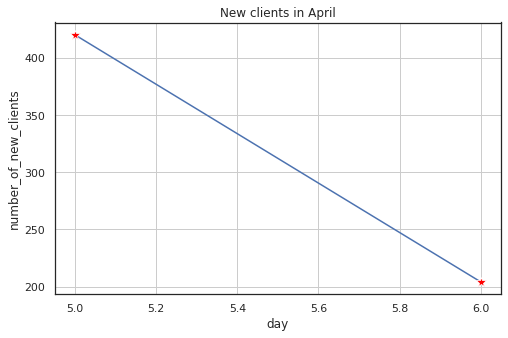

In [41]:

plt.figure(figsize=(8,5))
sns.lineplot(x='day',y='number_of_new_clients', data=rate_by_day, marker='*', markerfacecolor='red', markersize=10)\
        .set(title='New clients in April')
sns.set_theme(style='white', font_scale=1)

plt.grid()
plt.show()
